# Implementation of  K Means Clustering Algorithm with Smart Initialization  (k-means++)

In [1]:
#Author: Swapnil Acharya
#Date: 11/03/2020

In [58]:
#Import Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import random

In [59]:
#read data from file
bm_df = pd.read_csv("buddymove.csv")

In [60]:
#view info of read file
bm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [61]:
#view features of read file
bm_df.columns

Index(['User Id', 'Sports', 'Religious', 'Nature', 'Theatre', 'Shopping',
       'Picnic'],
      dtype='object')

In [62]:
bm_df

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86
...,...,...,...,...,...,...,...
244,User 245,18,139,148,129,129,168
245,User 246,22,114,228,104,84,168
246,User 247,20,124,178,104,158,174
247,User 248,20,133,149,139,144,213


In [63]:
bm_df = bm_df.drop("User Id",1)
bm_df

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86
...,...,...,...,...,...,...
244,18,139,148,129,129,168
245,22,114,228,104,84,168
246,20,124,178,104,158,174
247,20,133,149,139,144,213


In [64]:
def get_cluster_labels(distances):
    """This function returns clusters labels for given distances from/to centroids
    
    Args:
        distances: A feature_count by clusters [n,k] matrix, containing distances from fro given centroid k
    
    Returns:
        clusters_labels: A n*1 matrix containing the index of the minimum distance
    """
    cluster_labels = np.argmin(distances,axis=1)
    return cluster_labels

In [65]:
def revise_cluster_centers(datapoints,cluster_labels,k):
    centroids= np.zeros([k,datapoints.shape[1]])
    for i in range(0,k):
        dpoints = datapoints[cluster_labels==i]
        centroids[i,:] = np.mean(dpoints,axis=0)
    return centroids

In [66]:
def get_initial_centroids(features_matrix,k):
    rand_indexes = np.random.randint(features_matrix.shape[0],size=k)
    centroids = features_matrix[rand_indexes]
    centroids.shape = (k,features_matrix.shape[1])
    return centroids

In [69]:
def compute_stoppage(centroids):
     k = centroids.shape[1]
     

In [70]:
def k_means(features_matrix,k,max_iter,gain_threshold = 10e8,verbose=True):
    
    centroids = get_initial_centroids(features_matrix,k)
    
    if verbose:
        print("Initial Centroids Are: ", centroids)
        print("Initial Centroids Shape: ",centroids.shape)
        print("\n")
        
    distances = np.zeros((features_matrix.shape[0],k),float)
    print("Distances: " ,distances.shape)
    
    for i in range(0,max_iter):
        
        for j in range(0,k):
            distances[:,j] = np.linalg.norm((centroids[j,:]-features_matrix),axis=1)
            #print(centroids[j,:])
            #x = np.linalg.norm((centroids[j,:]-features_matrix),axis=1)
            #print(x.shape)
            #break
            
        #print(x.shape)
        #break
            #print(x.shape)
        #print(distances.shape)
        
        cluster_labels = get_cluster_labels(distances) 

        
        centroids = revise_cluster_centers(features_matrix,cluster_labels,k)
    
        if verbose:
            print(" Iteration: ",i, "\n Revised Centroids: \n",centroids)
            print("\n")
            
    return cluster_labels, centroids

In [71]:
def transform_nD_to_2D(features_matrix):
    pca = PCA(n_components = 2)# Number of components to keep
    features_matrix_pca = pca.fit_transform(features_matrix)
    return features_matrix_pca

In [72]:
features_matrix = bm_df.to_numpy()

In [75]:
features_matrix = transform_nD_to_2D(features_matrix)

In [76]:
cluster_labels, centroids = k_means(features_matrix, k = 2, max_iter=9000,verbose=False)
print("Cluster Labels: ", cluster_labels)
print("Centroids", centroids)

Distances:  (249, 2)
Cluster Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Centroids [[ 46.30914351  16.13651207]
 [-43.77661223 -15.25404657]]


In [148]:
centroids.shape

(2, 2)

In [155]:
def visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k):
    fig, ax = plt.subplots()
    for i in range(0,k):
        dpoints = features_matrix[cluster_labels==i]
        ax.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50)
        ax.scatter(centroids[i,0],centroids[i,1],marker="o",s=100) #plot points
        
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Clusters and Centroids")

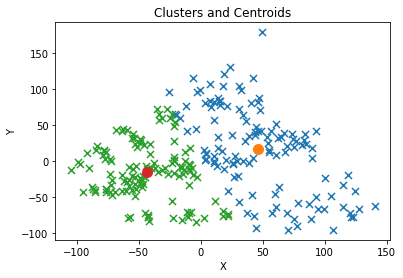

In [157]:
visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k=2)